## DNN Model for Heart Failure Prediction
Deep Neural Network with 1 hidden layer. 
  
Oishik Mukhopadhyay, 31 October, 2021

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from random import shuffle

In [30]:
import numpy as np

In [31]:
heart = np.load('heart-failure-prediction/etl_heart.npy')

In [32]:
shuffle(heart)

In [33]:
print(len(heart), len(heart[0]))

918 12


In [34]:
X = np.array(heart[:,:-1])
y = np.array(heart[:, -1])

In [35]:
y = to_categorical(y)

In [36]:
model = Sequential(
    [
        Dense(11, input_dim=11, activation='sigmoid'),
        Dense(11, activation='sigmoid'),
        Dense(2, activation='softmax')
    ]
)

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_7 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 24        
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(X, y, epochs=50, verbose=0, validation_split=0.1)

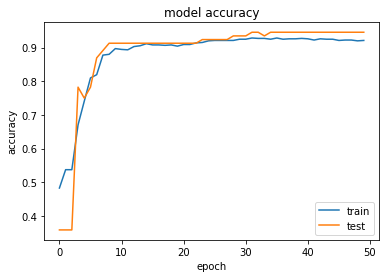

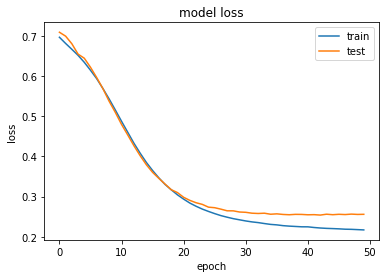

In [40]:
# summarize history for acc
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [41]:
print('Max val_acc achieved: %.2f' %(max(history.history['val_acc'])*100), '%')
print('Max acc achieved: %.2f' %(max(history.history['acc'])*100), '%')

Max val_acc achieved: 94.57 %
Max acc achieved: 92.86 %


In [42]:
print('Final val_acc achieved: %.2f' %(history.history['val_acc'][-1]*100), '%')
print('Final acc achieved: %.2f' %(history.history['acc'][-1]*100), '%')

Final val_acc achieved: 94.57 %
Final acc achieved: 92.13 %
